<a href="https://colab.research.google.com/github/RozhanoHashemi/smart_environments_lesson/blob/main/price_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

پروژه ی تخمین قیمت خانه برحسب پارامتر های مختلف

In [ ]:
!gdown 11MHnEe35WTpm6Ifpp9twFVi1JaMfnWt5

Downloading...
From: https://drive.google.com/uc?id=11MHnEe35WTpm6Ifpp9twFVi1JaMfnWt5
To: /content/data.csv
100% 35.2k/35.2k [00:00<00:00, 67.5MB/s]


In [ ]:
!pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from joblib import dump, load
from sklearn.preprocessing import MinMaxScaler


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import seaborn as sns

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns
import scipy.stats as stats
import skfuzzy as fuzz
import skfuzzy.control as ctrl

In [ ]:
# Reading data from csv

housing = pd.read_csv("/content/data.csv")
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


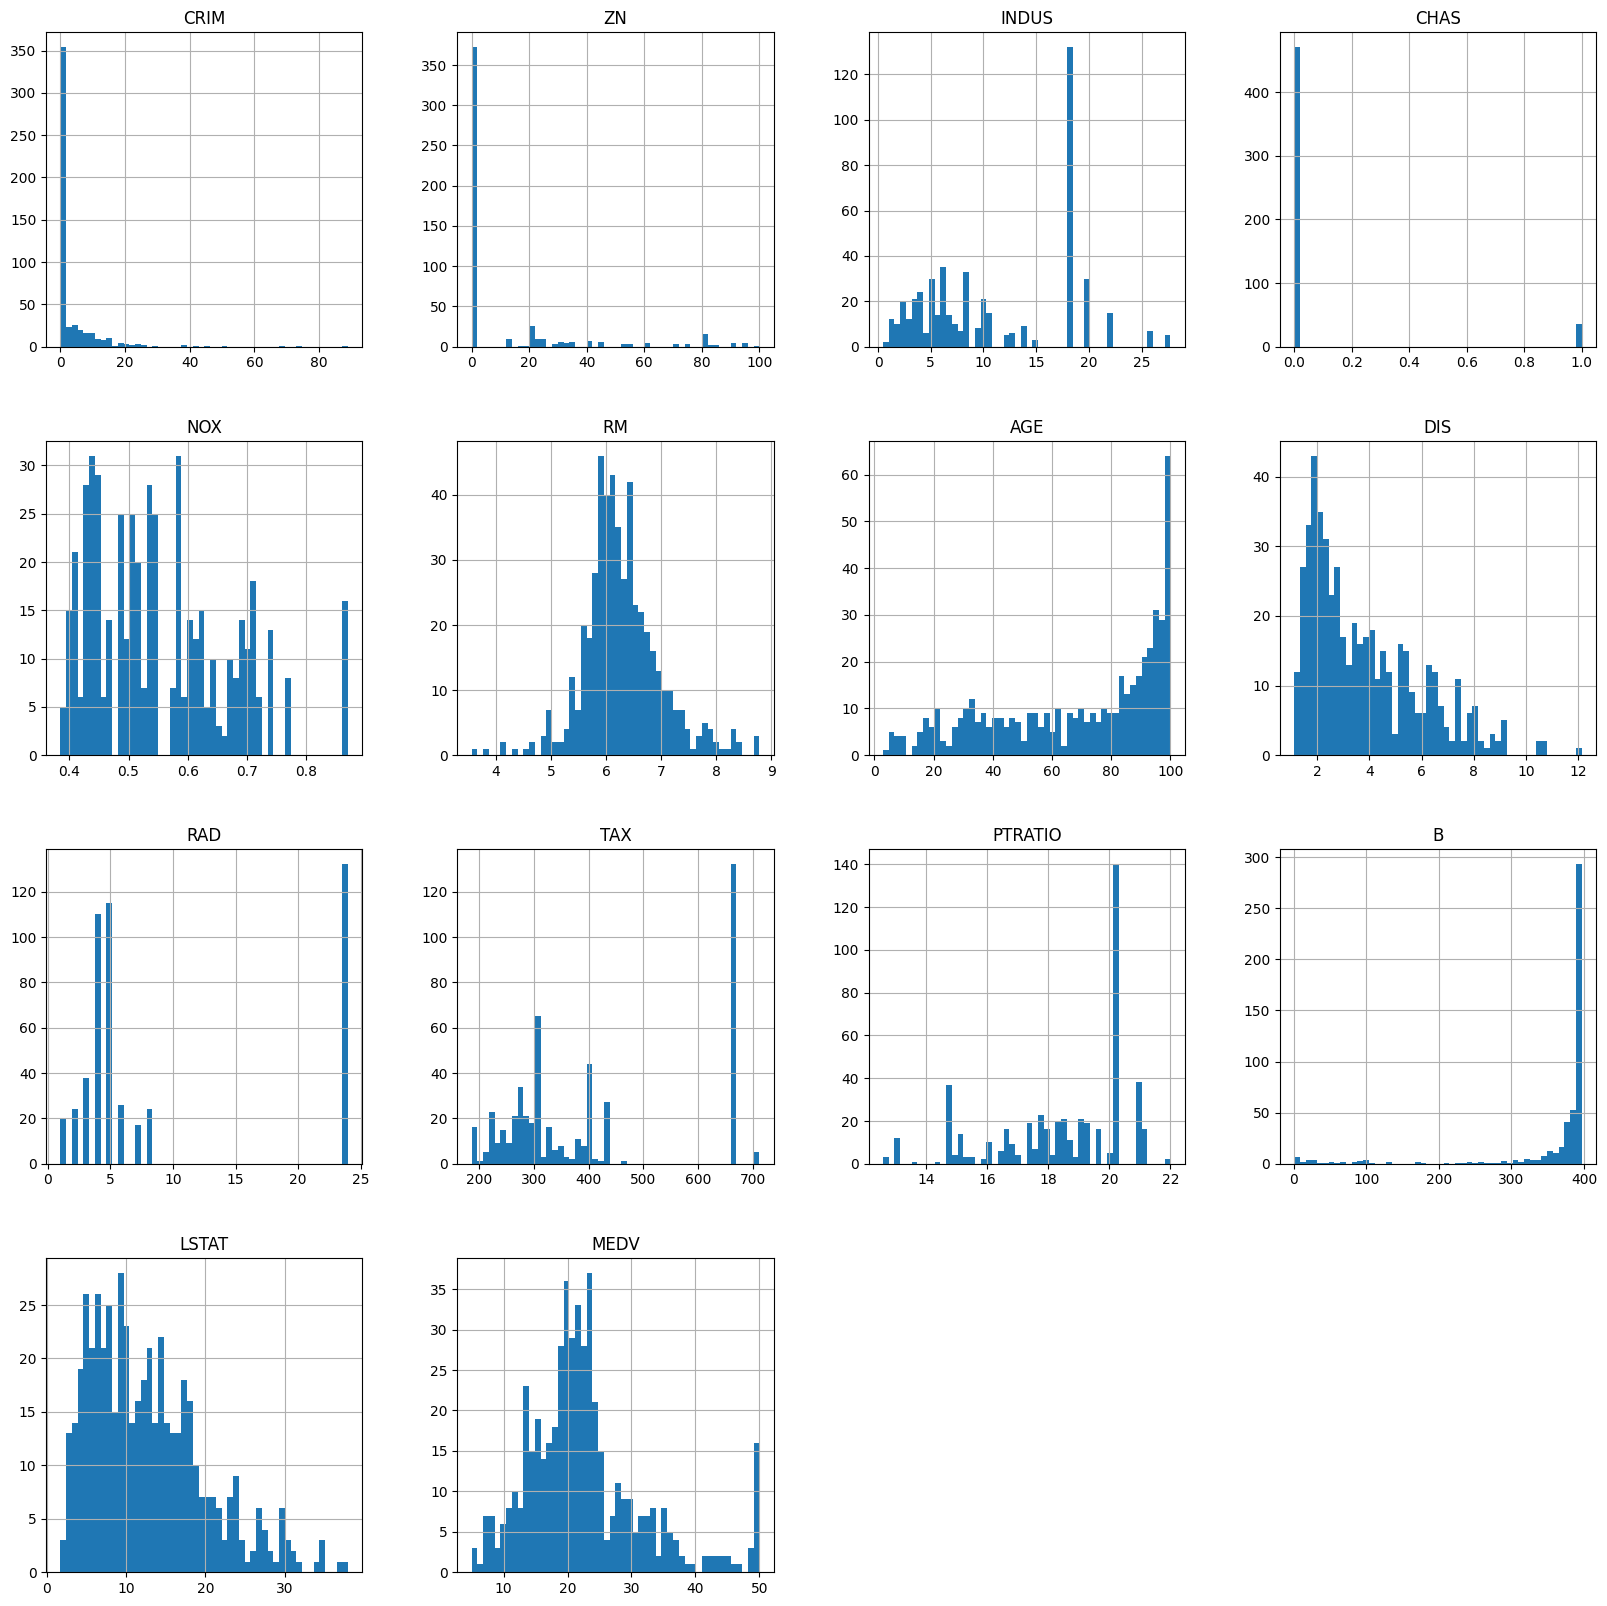

In [ ]:
# Plotting the data

housing.hist(bins=50, figsize=(20,20))
plt.show()

DATA SPLIT

In [ ]:

# Doing the train-test split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=23)



In [ ]:
train_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
175,0.06664,0.0,4.05,0,0.510,6.546,33.1,3.1323,5,296,16.6,390.96,5.33,29.4
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
61,0.17171,25.0,5.13,0,0.453,5.966,93.4,6.8185,8,284,19.7,378.08,14.44,16.0
13,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
188,0.12579,45.0,3.44,0,0.437,6.556,29.1,4.5667,5,398,15.2,382.84,4.56,29.8


In [ ]:
test_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
176,0.07022,0.0,4.05,0,0.510,6.020,47.2,3.5549,5,296,16.6,393.23,10.11,23.2
311,0.79041,0.0,9.90,0,0.544,6.122,52.8,2.6403,4,304,18.4,396.90,5.98,22.1
94,0.04294,28.0,15.04,0,0.464,6.249,77.3,3.6150,4,270,18.2,396.90,10.59,20.6
139,0.54452,0.0,21.89,0,0.624,6.151,97.9,1.6687,4,437,21.2,396.90,18.46,17.8
232,0.57529,0.0,6.20,0,0.507,8.337,73.3,3.8384,8,307,17.4,385.91,2.47,41.7


In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=23)
for train_index, test_index in split.split(housing, housing["CHAS"]):
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]



In [ ]:
    strat_train_set["CHAS"].value_counts()

,count
CHAS,
0,376
1,28


In [ ]:
strat_test_set["CHAS"].value_counts()

,count
CHAS,
0,95
1,7


In [ ]:
housing = strat_train_set.copy()


FINDING THE CORRELATION

In [ ]:
# Correlations

corr_matrix = housing.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

,MEDV
MEDV,1.000000
RM,0.695955
ZN,0.335542
B,0.334133
DIS,0.258135
CHAS,0.195455
AGE,-0.379487
CRIM,-0.387124
RAD,-0.394164
NOX,-0.438412


ماتریس همبستگی بین متغیرها:
             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219433  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311173 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.394193  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091468  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302751  0.731470   
RM      -0.219433  0.311173 -0.394193  0.091468 -0.302751  1.000000 -0.240286   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240286  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.203507 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.210718  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292794  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.357612  0.261515   


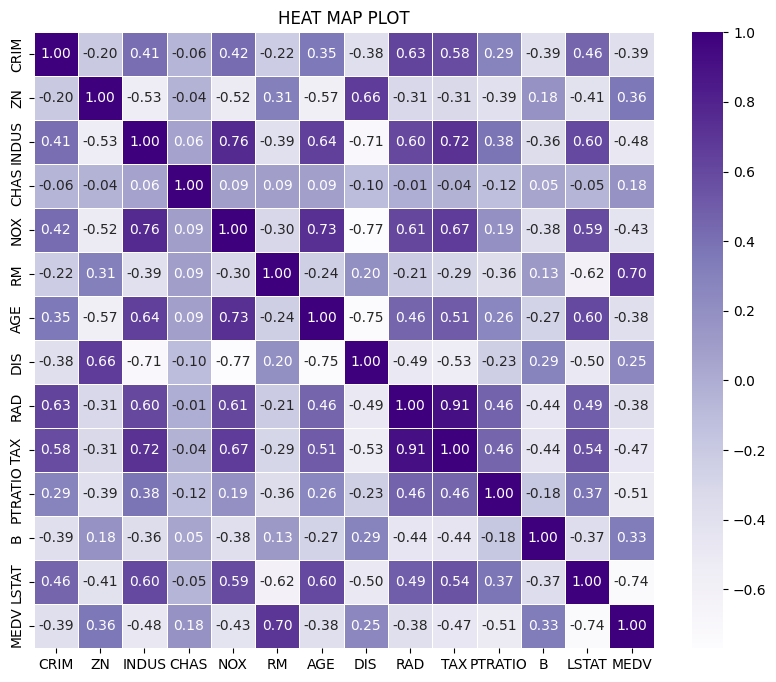

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# فرض می‌کنیم دیتاست شما در DataFrame به نام housing قرار دارد.
# محاسبه ماتریس همبستگی
correlation_matrix = housing.corr()

# چاپ مقادیر همبستگی
print("ماتریس همبستگی بین متغیرها:")
print(correlation_matrix)

# رسم نمودار هیت‌مپ
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Purples", linewidths=0.5)
plt.title("HEAT MAP PLOT")
plt.show()


array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

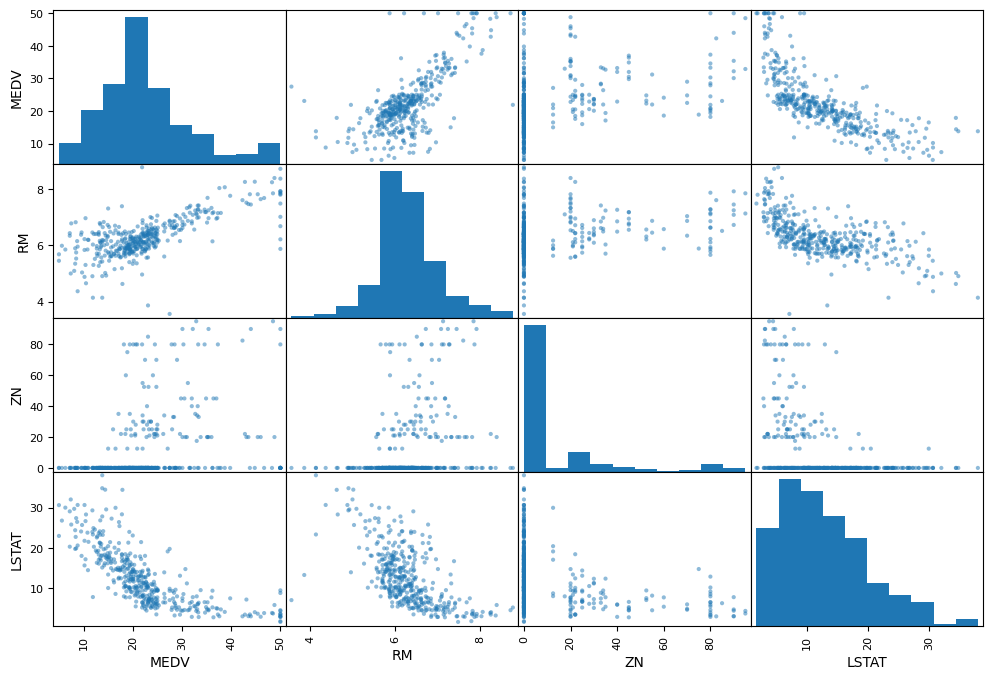

In [ ]:
# Plotting the columns to understand Correlations

attributes = ["MEDV" , "RM" , "ZN" , "LSTAT"]
scatter_matrix(housing[attributes] , figsize=(12,8))


In [ ]:
# Trying out attribute combinations

housing["TAXRM"] = housing["TAX"] / housing["RM"]
housing.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
55,0.01311,90.0,1.22,0,0.403,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4,31.176714
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28,25.0,37.321456
284,0.00906,90.0,2.97,0,0.400,7.088,20.8,7.3073,1,285,15.3,394.72,7.85,32.2,40.208804
497,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391,19.2,396.90,14.10,18.3,67.483604
399,9.91655,0.0,18.10,0,0.693,5.852,77.8,1.5004,24,666,20.2,338.16,29.97,6.3,113.807245


In [ ]:
corr_matrix = housing.corr()
corr_matrix["MEDV"].sort_values(ascending=False)



,MEDV
MEDV,1.000000
RM,0.695955
ZN,0.335542
B,0.334133
DIS,0.258135
CHAS,0.195455
AGE,-0.379487
CRIM,-0.387124
RAD,-0.394164
NOX,-0.438412


<Axes: xlabel='TAXRM', ylabel='MEDV'>

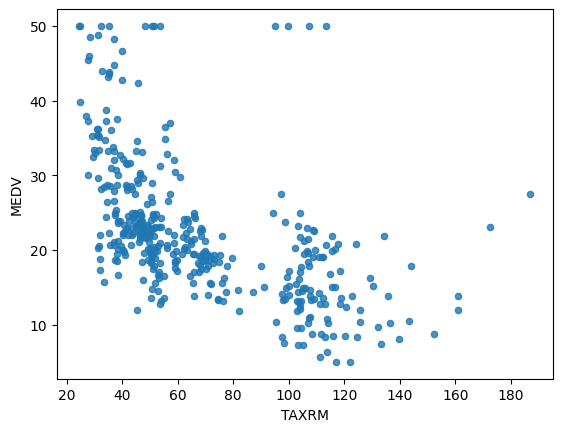

In [ ]:
housing.plot(kind="scatter" , x="TAXRM" , y="MEDV" , alpha=0.8)

In [ ]:
housing.shape

housing.describe() # Before we started filling the missing values


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000
mean,3.822060,11.038366,11.245223,0.069307,0.555853,6.300318,69.710396,3.796705,9.777228,411.643564,18.468069,354.837995,12.708614,22.510891,67.339176
std,9.114250,22.767579,6.912921,0.254290,0.116685,0.713141,27.874550,2.164456,8.769724,169.294923,2.176822,94.045067,7.091161,9.260827,31.738297
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,24.645639
25%,0.082973,0.000000,5.130000,0.000000,0.449000,5.886500,46.175000,2.070275,4.000000,281.000000,17.000000,374.237500,7.092500,17.075000,43.714951
50%,0.260420,0.000000,9.900000,0.000000,0.538000,6.214000,79.850000,3.157500,5.000000,334.500000,19.100000,391.240000,11.300000,21.200000,53.858803
75%,3.694070,12.500000,18.100000,0.000000,0.625750,6.636750,94.525000,5.212575,24.000000,666.000000,20.200000,395.690000,17.112500,25.000000,98.670322
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,187.026116


In [ ]:
# Filling missing values attributes

imputer = SimpleImputer(strategy="median") # To fill the missing cells of columns with median values
imputer.fit(housing)

SimpleImputer(strategy='median')

In [ ]:

# Feature and Target Selection
X_train = strat_train_set.drop("MEDV", axis=1)
y_train = strat_train_set["MEDV"]
X_test = strat_test_set.drop("MEDV", axis=1)
y_test = strat_test_set["MEDV"]


In [ ]:
# Handling Missing Values using Median Imputation
imputer = SimpleImputer(strategy="median")
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define models (only regression models)
models = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(kernel='rbf'),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=23),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=23)
}


In [ ]:
# Train and Evaluate Models
results = {}
mse_values = []
rmse_values = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mse_values.append(mse)
    rmse_values.append(rmse)
    results[name] = {"MSE": mse, "RMSE": rmse, "Predictions": y_pred}

In [ ]:
# Normalize MSE and RMSE between 0 and 1
scaler_mse = MinMaxScaler()
scaler_rmse = MinMaxScaler()

normalized_mse = scaler_mse.fit_transform(np.array(mse_values).reshape(-1, 1)).flatten()
normalized_rmse = scaler_rmse.fit_transform(np.array(rmse_values).reshape(-1, 1)).flatten()

In [ ]:
# Update results with normalized values
for i, name in enumerate(models.keys()):
    results[name]["Normalized MSE"] = normalized_mse[i]
    results[name]["Normalized RMSE"] = normalized_rmse[i]

# Compare Models
results_df = pd.DataFrame(results).T
print("Model Performance Comparison:")
print(results_df)

Model Performance Comparison:
                               MSE      RMSE  \
Linear Regression          22.9374  4.789301   
SVR                      27.325923   5.22742   
Random Forest Regressor   9.413648  3.068167   
Decision Tree Regressor  17.288137  4.157901   

                                                               Predictions  \
Linear Regression        [34.26036426132661, 20.201929686012267, 14.381...   
SVR                      [26.446597146295314, 18.798181462483214, 14.96...   
Random Forest Regressor  [28.203999999999994, 18.266999999999985, 14.41...   
Decision Tree Regressor  [27.5, 18.3, 20.1, 17.8, 11.8, 48.5, 22.2, 20....   

                        Normalized MSE Normalized RMSE  
Linear Regression             0.754999        0.797097  
SVR                                1.0             1.0  
Random Forest Regressor            0.0             0.0  
Decision Tree Regressor       0.439614        0.504681  


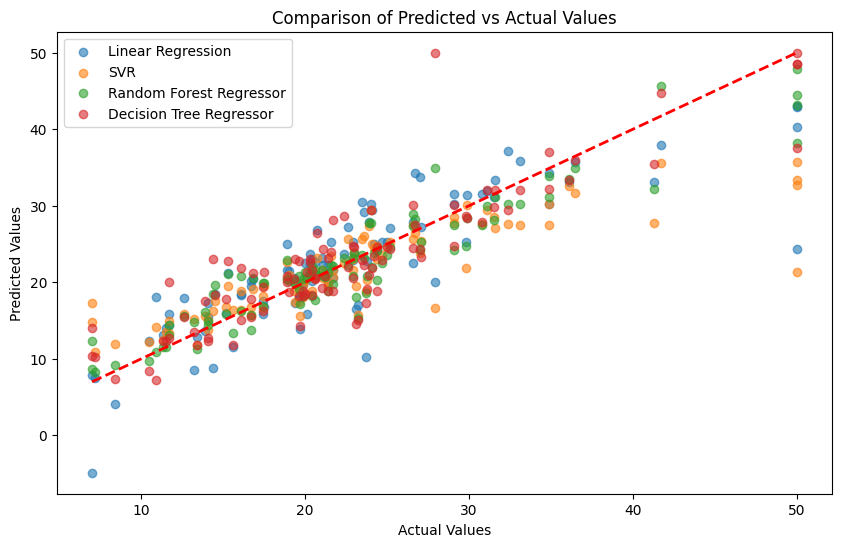

In [ ]:
# Plot Predictions vs Actual Values
plt.figure(figsize=(10, 6))
for name, res in results.items():
    plt.scatter(y_test, res["Predictions"], label=name, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Comparison of Predicted vs Actual Values")
plt.show()



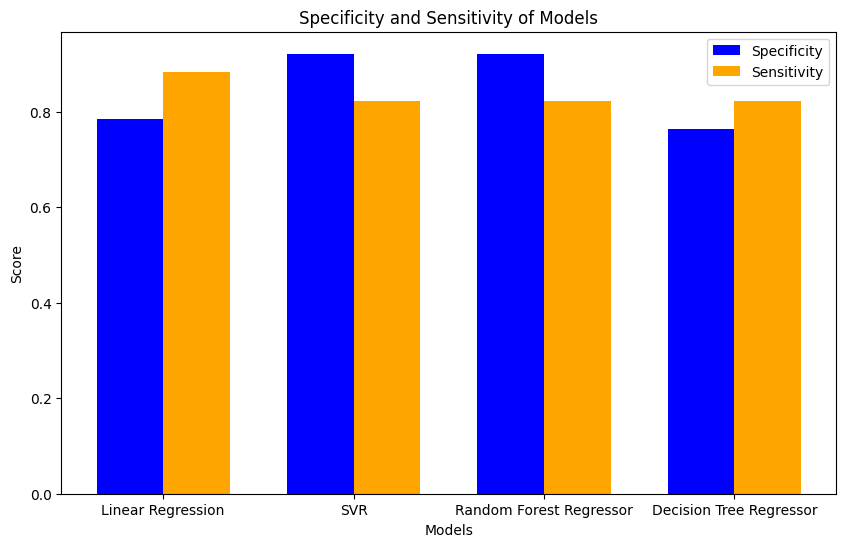

In [ ]:

# Specificity and Sensitivity Calculation
threshold = np.median(y_test)  # Threshold based on median for classification
binary_y_test = (y_test >= threshold).astype(int)

for name, model in models.items():
    y_pred_binary = (results[name]["Predictions"] >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(binary_y_test, y_pred_binary).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    results[name]["Specificity"] = specificity
    results[name]["Sensitivity"] = sensitivity

# Plot Specificity and Sensitivity using grouped bar chart
x = np.arange(len(models))  # محل مدل‌ها روی محور x
width = 0.35  # عرض هر میله
fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, [results[name]["Specificity"] for name in models.keys()], width, label="Specificity", color='blue')
bars2 = ax.bar(x + width/2, [results[name]["Sensitivity"] for name in models.keys()], width, label="Sensitivity", color='orange')

ax.set_xlabel("Models")
ax.set_ylabel("Score")
ax.set_title("Specificity and Sensitivity of Models")
ax.set_xticks(x)
ax.set_xticklabels(models.keys())
ax.legend()
plt.show()

In [ ]:
# Determine the Best Model
best_model = min(results, key=lambda x: results[x]["RMSE"])
print(f"Best Model Based on RMSE: {best_model}")


Best Model Based on RMSE: Random Forest Regressor


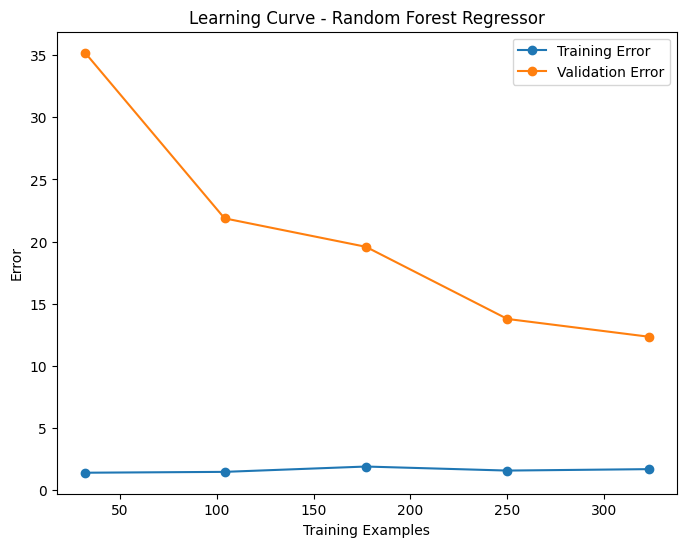

In [ ]:

# Learning Curve for the best model
best_model_name = min(results, key=lambda x: results[x]["Normalized RMSE"])
best_model = models[best_model_name]
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training Error")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Validation Error")
plt.xlabel("Training Examples")
plt.ylabel("Error")
plt.title(f"Learning Curve - {best_model_name}")
plt.legend()
plt.show()


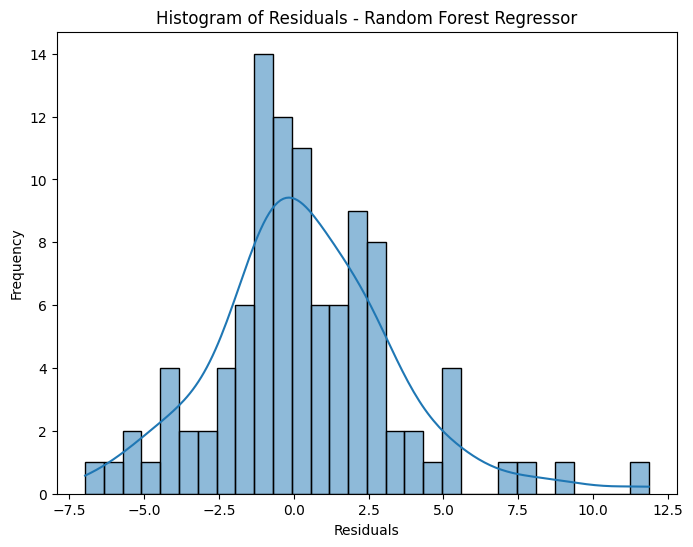

In [ ]:
# محاسبه باقی‌مانده‌ها (Residuals)
residuals = y_test - results[best_model_name]["Predictions"]

# Histogram of Residuals
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title(f"Histogram of Residuals - {best_model_name}")
plt.show()


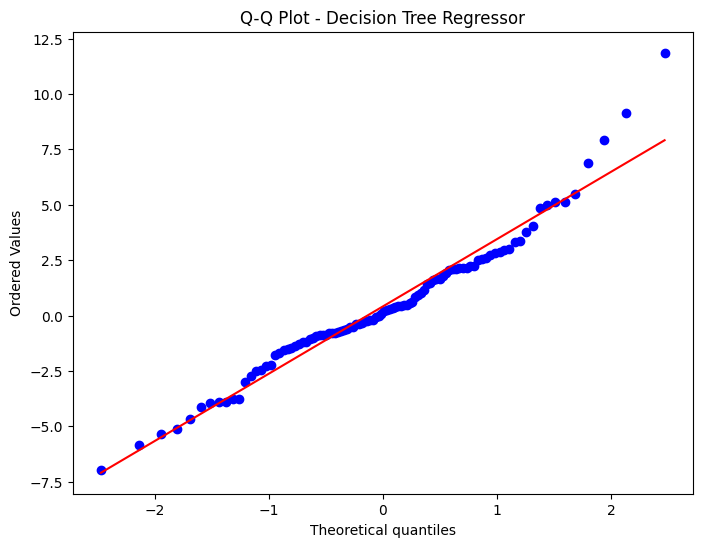

In [ ]:
    # Q-Q Plot
    plt.figure(figsize=(8,6))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot - {name}")
    plt.show()

گرفتن ورودی از کاربر


In [ ]:
1# Mapping feature names to full descriptions
feature_descriptions = {
    "CRIM": "Crime rate per capita (float)",
    "ZN": "Proportion of residential land zoned for large lots (float)",
    "INDUS": "Proportion of non-retail business acres (float)",
    "CHAS": "Charles River dummy variable (0 or 1, integer)",
    "NOX": "Nitrogen oxide concentration (float)",
    "RM": "Average number of rooms per dwelling (float)",
    "AGE": "Proportion of owner-occupied units built before 1940 (float)",
    "DIS": "Weighted distance to employment centers (float)",
    "RAD": "Accessibility index to radial highways (integer)",
    "TAX": "Property tax rate per $10,000 (integer)",
    "PTRATIO": "Pupil-teacher ratio by town (float)",
    "B": "Proportion of Black population (float)",
    "LSTAT": "Percentage of lower status population (float)"
}

# User Input for House Price Prediction
print("Enter the following features for house price prediction:")
user_input = {}
for feature in feature_descriptions.keys():
    user_input[feature] = float(input(f"{feature_descriptions[feature]}: "))

# Convert user input to DataFrame and preprocess
user_df = pd.DataFrame([user_input])
user_df = pd.DataFrame(imputer.transform(user_df), columns=user_df.columns)
user_df_scaled = scaler.transform(user_df)

# Predict house price
predicted_price = best_model.predict(user_df_scaled)
print(f"Predicted House Price: {predicted_price[0]}")


Enter the following features for house price prediction:
Crime rate per capita (float): 0.0065
Proportion of residential land zoned for large lots (float): 16
Proportion of non-retail business acres (float): 2.4
Charles River dummy variable (0 or 1, integer): 0
Nitrogen oxide concentration (float): 0.543
Average number of rooms per dwelling (float): 6.57
Proportion of owner-occupied units built before 1940 (float): 65.2
Weighted distance to employment centers (float): 4.09
Accessibility index to radial highways (integer): 1
Property tax rate per $10,000 (integer): 298
Pupil-teacher ratio by town (float): 21
Proportion of Black population (float): 392.1
Percentage of lower status population (float): 4.98
Predicted House Price: 26.158


In [ ]:

# Fuzzy System for Decision Making on Buying the House
features = {
    "CRIM": ctrl.Antecedent(np.arange(0, 100, 1), 'CRIM'),
    "ZN": ctrl.Antecedent(np.arange(0, 100, 1), 'ZN'),
    "INDUS": ctrl.Antecedent(np.arange(0, 50, 1), 'INDUS'),
    "CHAS": ctrl.Antecedent(np.arange(0, 2, 1), 'CHAS'),
    "NOX": ctrl.Antecedent(np.arange(0, 1, 0.01), 'NOX'),
    "RM": ctrl.Antecedent(np.arange(1, 10, 0.1), 'RM'),
    "AGE": ctrl.Antecedent(np.arange(0, 100, 1), 'AGE'),
    "DIS": ctrl.Antecedent(np.arange(0, 12, 0.1), 'DIS'),
    "RAD": ctrl.Antecedent(np.arange(1, 25, 1), 'RAD'),
    "TAX": ctrl.Antecedent(np.arange(100, 800, 10), 'TAX'),
    "PTRATIO": ctrl.Antecedent(np.arange(10, 30, 1), 'PTRATIO'),
    "B": ctrl.Antecedent(np.arange(0, 400, 10), 'B'),
    "LSTAT": ctrl.Antecedent(np.arange(0, 40, 1), 'LSTAT'),
    "price": ctrl.Antecedent(np.arange(0, 1000000, 10000), 'price'),
    "recommendation": ctrl.Consequent(np.arange(0, 10, 1), 'recommendation')
}

# Automatically generate membership functions
for feature in features:
    if feature != "recommendation":
        features[feature].automf(3)  # 'poor', 'average', 'good'
features["recommendation"].automf(names=['not_buy', 'buy'])

# Defining multiple fuzzy rules
rules = []
rules.append(ctrl.Rule(features["price"]["poor"] & features["RM"]["good"] & features["DIS"]["good"], features["recommendation"]["buy"]))
rules.append(ctrl.Rule(features["price"]["good"] & features["CRIM"]["poor"] & features["LSTAT"]["poor"], features["recommendation"]["not_buy"]))
rules.append(ctrl.Rule(features["price"]["average"] & features["AGE"]["poor"] & features["TAX"]["poor"], features["recommendation"]["buy"]))
rules.append(ctrl.Rule(features["NOX"]["good"] & features["DIS"]["poor"], features["recommendation"]["not_buy"]))
rules.append(ctrl.Rule(features["RAD"]["good"] & features["PTRATIO"]["poor"], features["recommendation"]["buy"]))
rules.append(ctrl.Rule(features["ZN"]["average"] & features["INDUS"]["good"], features["recommendation"]["buy"]))
rules.append(ctrl.Rule(features["B"]["good"] & features["LSTAT"]["good"], features["recommendation"]["buy"]))
rules.append(ctrl.Rule(features["TAX"]["good"] & features["PTRATIO"]["good"], features["recommendation"]["not_buy"]))
rules.append(ctrl.Rule(features["CHAS"]["good"] & features["price"]["average"], features["recommendation"]["buy"]))

# Creating fuzzy control system
system_ctrl = ctrl.ControlSystem(rules)
system = ctrl.ControlSystemSimulation(system_ctrl)

# Assigning input values
for feature in features:
    if feature != "recommendation":
        system.input[feature] = np.random.uniform(features[feature].universe.min(), features[feature].universe.max())

# Compute fuzzy output
system.compute()

print(f"Fuzzy Recommendation Score: {system.output['recommendation']}")
if system.output['recommendation'] >= 5:
    print("Recommendation: Buy the house")
else:
    print("Recommendation: Do not buy the house")


Fuzzy Recommendation Score: 5.0427041864857545
Recommendation: Buy the house
